In [1]:
int runid = 101;
TCanvas *c1 = new TCanvas;

#### MakeCoin 生成的ROOT文件：coin0089.root

In [2]:
TFile *f1 = new TFile(Form("../COIN_ROOT/coin%04d.root",runid));
TTree *treeMe = (TTree*)f1->Get("tree");

#### ana 生成的ROOT文件：g0089.root

In [3]:
TFile *f2 = new TFile(Form("/data/d3/DataZhu/ANA_ROOT/g%04d.root",runid));
TTree *treeLi = (TTree*)f2->Get("tree");

#### 验证Chico信息：两文件中的核子飞行角度theta,phi存在一定差异，导致核子质量、速度、Q值以及对gamma的多普勒修正出现偏差

In [4]:
cout<<"coin0089.root"<<endl;
treeMe->Scan("ts:thetaP:phiP:massP:betaP:pseuQ","","colsize=13",10,0);
cout<<endl<<"g0089.root"<<endl;
treeLi->Scan("ts:thetaP:phiP:MassP:BetaP:Qval1","","colsize=13",10,0);

coin0089.root
************************************************************************************************************
*    Row   *            ts *        thetaP *          phiP *         massP *         betaP *         pseuQ *
************************************************************************************************************
*        0 * 8393215119580 * 0.49603778123 * 4.50841760635 * 152.259567260 * 0.11065337061 * -142.55712890 *
*        1 * 8393215334270 * 0.41256648302 * 6.14279365539 * 123.865097045 * 0.10456195473 * -261.98901367 *
*        2 * 8393215600590 * 0.49408930540 * 5.39588069915 * 135.700881958 * 0.10284428298 * -242.36413574 *
*        3 * 8393215896760 * 0.44544452428 * 5.95373916626 *  131.05418396 * 0.10516678541 * -239.19769287 *
*        4 * 8393216079200 * 0.47709855437 * 1.76972484588 * 130.308105468 * 0.11358357965 * -113.52941894 *
*        5 * 8393216289440 * 0.43487590551 * 2.38252425193 * 138.072341918 * 0.12293662875 * -5.1451416015 *
*    

#### 逐文件检查代码，发现这种差异来源于 r2root/sortChico.cc 中对theta,phi进行刻度时，加上了随机数，每次运行结果均不一样
``` c++
if(abs(vcathodemap)==1){
    theta[l]=(ChicoEvent->cathode_tdc_val[i]-ChicoEvent->cathode_tdc_val[j])*cathodesign;
    ftheta[l] = gainTheta[anode[l]]*(float)theta[l];
    ftheta[l] += offTheta[anode[l]];
    ftheta[l] += (float)rand()/d-0.5;//随机数
    validT[l]=1;
}
if(abs(vcathodemap)==2){
    phi[l]=(ChicoEvent->cathode_tdc_val[i]-ChicoEvent->cathode_tdc_val[j])*cathodesign;
    fphi[l] = gainPhi[anode[l]]*(float)phi[l];
    fphi[l] += offPhi[anode[l]];
    fphi[l] += 36.0*(float)(anode[l]%10);
    fphi[l] += (float)rand()/d-0.5;//随机数
    validP[l]=1;
}
```

In [5]:
TH1D *Me,*Li;

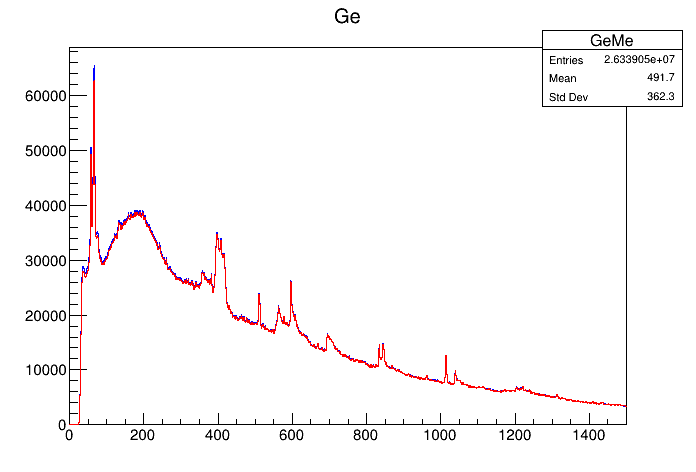

In [6]:
treeMe->Draw("Ge>>GeMe(1500,0,1500)");
Me = (TH1D*)gROOT->FindObject("GeMe");
Me->SetLineColor(kBlue);

treeLi->Draw("Ge>>GeLi(1500,0,1500)");
Li = (TH1D*)gROOT->FindObject("GeLi");
Li->SetLineColor(kRed);

Me->Draw();
Li->Draw("same");
c1->Draw();

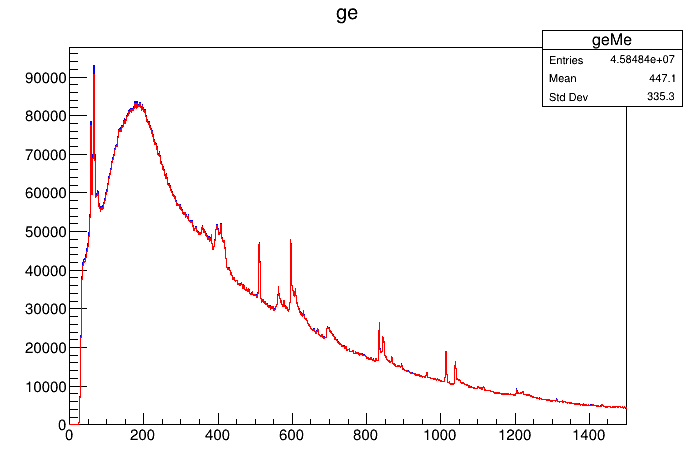

In [7]:
treeMe->Draw("ge>>geMe(1500,0,1500)");
Me = (TH1D*)gROOT->FindObject("geMe");
Me->SetLineColor(kBlue);

treeLi->Draw("ge>>geLi(1500,0,1500)");
Li = (TH1D*)gROOT->FindObject("geLi");
Li->SetLineColor(kRed);

Me->Draw();
Li->Draw("same");
c1->Draw();

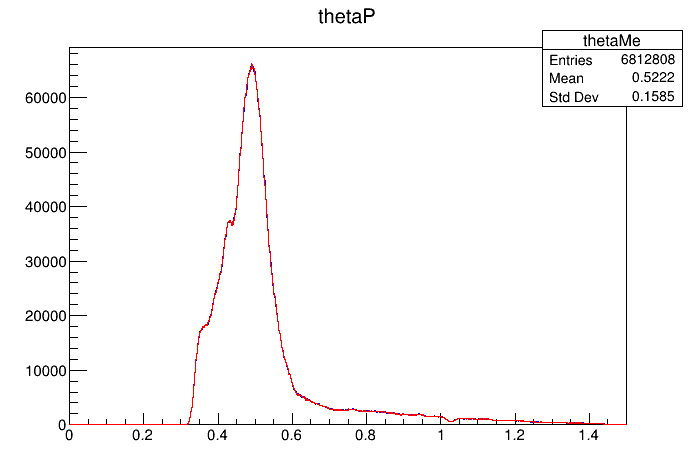

In [8]:
treeMe->Draw("thetaP>>thetaMe(1000,0,1.5)");
Me = (TH1D*)gROOT->FindObject("thetaMe");
Me->SetLineColor(kBlue);

treeLi->Draw("thetaP>>thetaLi(1000,0,1.5)");
Li = (TH1D*)gROOT->FindObject("thetaLi");
Li->SetLineColor(kRed);

Me->Draw();
Li->Draw("same");
c1->Draw();